In [1]:
what_were_covering = {1: "data (prepare and load)",
		      2: "build model",
		      3: "fitting the model to data (training)",
		      4: "making predictions and evaluating a model (inference)",
		      5: "saving and loading a model",
		      6: "putting it all together"
		      }
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.10.1+cu102'

## 1. data (prepare and load)

In [5]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [6]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
len(X), len(y)

(50, 50)

## 2. Splitting data

In [8]:
train_split = int(0.8 * len(X))
train_split

40

In [9]:
# training set, validation set, test set
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [11]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

## 3. Visualize

In [23]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None
                    ):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label= "Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label= "Predictions")
    plt.legend(prop={"size": 14});

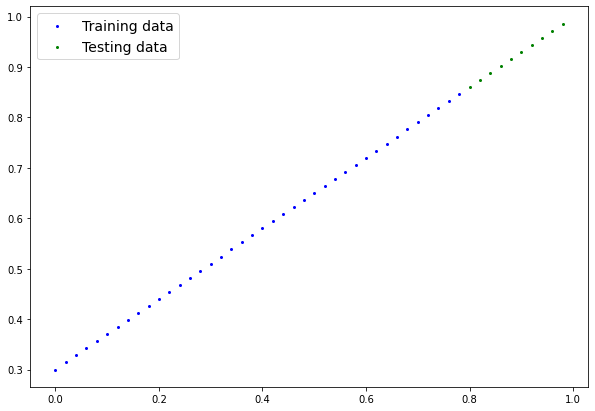

In [13]:
plot_predictions();

## 4. Build a PyTorch Model

In [14]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

## Checking the contents of our PyTorch Model

In [15]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

In [16]:
# Check out the parameters
list(model_0.parameters())

# List names parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
weight, bias

(0.7, 0.3)

In [18]:
## Making prediction using torch.inference_mode()
with torch.inference_mode():
	y_preds = model_0(X_test)

In [21]:
X_test[:5], y_preds[:5]

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800]]),
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251]]))

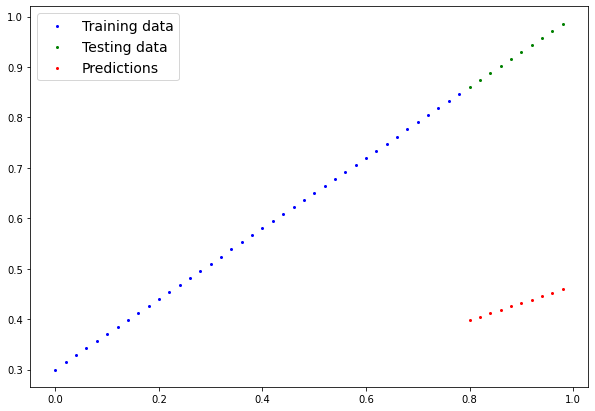

In [24]:
plot_predictions(predictions=y_preds)

## 4. Train Model

In [33]:
# Setup a loss function
loss_fn = nn.L1Loss()

In [26]:
# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.01)

In [38]:
# Setup a training loss

epochs = 100
# 1. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()
    # 2. Forward pass
    y_pred = model_0(X_train)
    # 3. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss : {loss}")
    # 4. Optimizer zero grad
    optimizer.zero_grad()
    # 5. Loss backward
    loss.backward()
    # 6. Optimizer step
    optimizer.step()

Loss : 0.18615034222602844
Loss : 0.1746293306350708
Loss : 0.16310831904411316
Loss : 0.1515873372554779
Loss : 0.14006635546684265
Loss : 0.1285453587770462
Loss : 0.11702437698841095
Loss : 0.1060912236571312
Loss : 0.09681284427642822
Loss : 0.08908725529909134
Loss : 0.08227583020925522
Loss : 0.07638873159885406
Loss : 0.07160007208585739
Loss : 0.06747635453939438
Loss : 0.06395438313484192
Loss : 0.06097004935145378
Loss : 0.05845819041132927
Loss : 0.05635259300470352
Loss : 0.0545857772231102
Loss : 0.053148526698350906
Loss : 0.05181945487856865
Loss : 0.05069301277399063
Loss : 0.0498228520154953
Loss : 0.04895269125699997
Loss : 0.04819351062178612
Loss : 0.047531817108392715
Loss : 0.04692792519927025
Loss : 0.04642331600189209
Loss : 0.04591871052980423
Loss : 0.04543796554207802
Loss : 0.04503796249628067
Loss : 0.04463795945048332
Loss : 0.04423796385526657
Loss : 0.04383796453475952
Loss : 0.04343796148896217
Loss : 0.043074630200862885
Loss : 0.04272563382983208
Loss

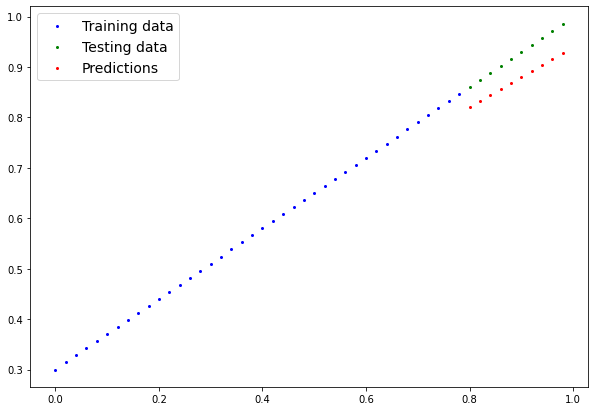

In [39]:
# Predictions
with torch.inference_mode():
	y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

## 5. Saving a model in PyTorch